In [120]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

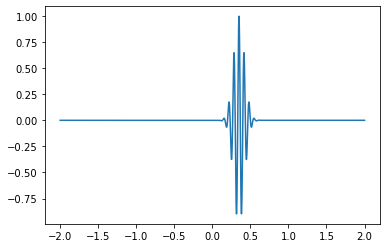

In [121]:
n=2000
tt = np.linspace(-2,2,n)

def make_gauss_pulse(center):
    c = center
    s = 0.1 # pulse width
    fc = 1.5 / s # central frequency
    ff_complex = np.exp(-((tt-c)/s)**2) * np.exp(1j * 2. * np.pi * fc * (tt-c))
    return ff_complex.real

ff = make_gauss_pulse(0.35)
plt.plot(tt,ff)

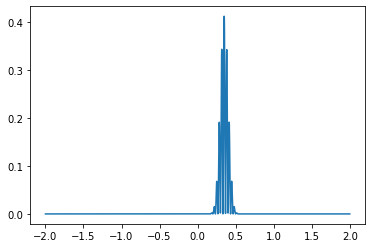

In [122]:
def absolutize(ff, rho=1e0):
    return np.sqrt(rho**2 + np.power(ff, 2)) - rho

ff2 = absolutize(ff)
plt.plot(tt,ff2)

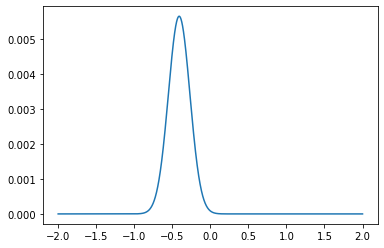

In [123]:
def make_gaussian(center, width):
    ff0 = np.exp(-((tt-center)/width)**2)
    return ff0 / np.sum(ff0)

gg = make_gaussian(-0.41, 0.2)
plt.plot(tt,gg)

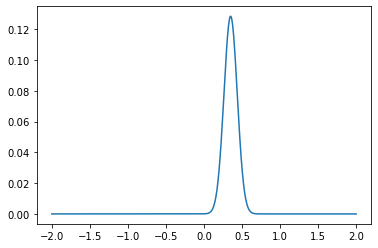

In [124]:
def make_gaussblur_matrix(width):
    B = np.zeros((n,n)) # Gaussblur matrix
    for k in range(n):
        B[k,:] = make_gaussian(tt[k], width)
    return B

B = make_gaussblur_matrix(0.1)

ff3 = np.dot(B, ff2)
plt.plot(tt,ff3)

Text(0.5, 1.0, 'J abs blur')

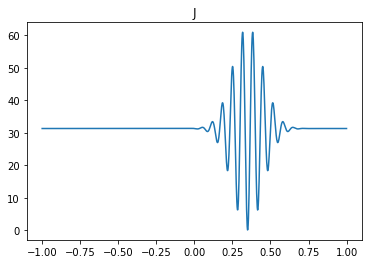

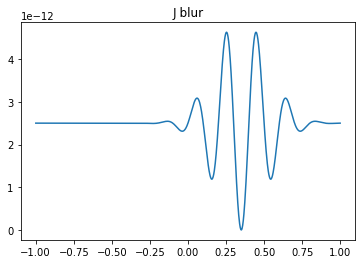

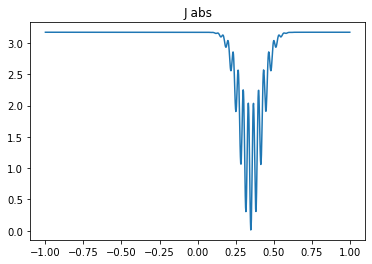

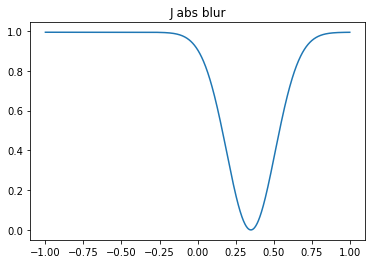

In [125]:
shifts = tt[np.bitwise_and(tt >= -1, tt < 1)]

blur_width = 0.2
B = make_gaussblur_matrix(blur_width)

def objective(shift):
    ff_predicted = make_gauss_pulse(shift)
    res = ff - ff_predicted
    J = 0.5 * np.dot(res, res)
    return J

def objective_blur(shift):
    ff_predicted = make_gauss_pulse(shift)
    res = ff - ff_predicted
    J = 0.5 * np.dot(res, np.dot(B, res))
    return J

def objective_abs(shift):
    ff_predicted = make_gauss_pulse(shift)
    res = absolutize(ff) - absolutize(ff_predicted)
    J = 0.5 * np.dot(res, res)
    return J

def objective_abs_blur(shift):
    ff_predicted = make_gauss_pulse(shift)
    res = absolutize(ff) - absolutize(ff_predicted)
    J = 0.5 * np.dot(res, np.dot(B, res))
    return J

ns = len(shifts)
JJ = np.zeros(ns)
JJ_blur = np.zeros(ns)
JJ_abs = np.zeros(ns)
JJ_abs_blur = np.zeros(ns)
for k in range(ns):
    JJ[k] = objective(shifts[k])
    JJ_blur[k] = objective_blur(shifts[k])
    JJ_abs[k] = objective_abs(shifts[k])
    JJ_abs_blur[k] = objective_abs_blur(shifts[k])

plt.figure()
plt.plot(shifts, JJ)
plt.title('J')

plt.figure()
plt.plot(shifts, JJ_blur)
plt.title('J blur')

plt.figure()
plt.plot(shifts, JJ_abs)
plt.title('J abs')

plt.figure()
plt.plot(shifts, JJ_abs_blur)
plt.title('J abs blur')

In [126]:
blur_widths = [0.001, 0.01, 0.1, 0.2]
all_JJ = []
for blur_width in blur_widths:
    B = make_gaussblur_matrix(blur_width)
    def objective_abs_blur(shift):
        ff_predicted = make_gauss_pulse(shift)
        res = absolutize(ff) - absolutize(ff_predicted)
        J = 0.5 * np.dot(res, np.dot(B, res))
        return J

    JJ = np.zeros(ns)
    for k in range(ns):
        JJ[k] = objective_abs_blur(shifts[k])
    all_JJ.append(JJ)

Text(0.5, 1.0, 'J abs blur with different blurring widths')

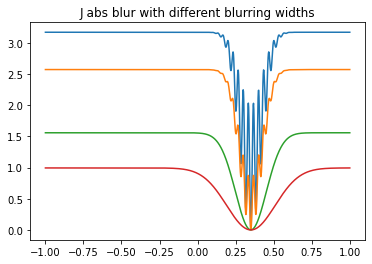

In [127]:
nb = len(blur_widths)

plt.figure()
for k in range(nb):
    plt.plot(shifts, all_JJ[k])
plt.title('J abs blur with different blurring widths')


